<a href="https://colab.research.google.com/github/shevank/Manejo-de-base-de-datos/blob/main/Agrupamiento_2da_parte_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
#Señalo la ruta del archivo con el siguiente codigo y lo leo en función al tipo de archivo y muestro el mismo
filename = '/content/drive/MyDrive/Data Science 2022/cust_seg.csv'     # csv
df = pd.read_csv(filename)   # csv
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [12]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [14]:
df.set_index(['Customer Id'], inplace = True)

In [15]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [17]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [18]:
#Chequeo cuantos valores hay según cada clase en la categoría
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [19]:
#Borro los valores faltantes 
df.dropna(inplace=True)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [20]:
#Escalar datos 
# Instanciar Escalador Estándar 
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)


In [21]:
#Entreno el modelo
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)


KMeans(n_clusters=5)

In [22]:
kmeans.labels_

array([1, 4, 4, 1, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 0, 4, 1, 0, 1, 0,
       4, 3, 1, 3, 3, 1, 3, 4, 4, 4, 1, 1, 1, 0, 4, 3, 4, 3, 3, 1, 0, 0,
       0, 0, 0, 4, 1, 1, 0, 3, 1, 3, 1, 1, 0, 1, 1, 0, 1, 4, 0, 4, 4, 0,
       3, 3, 0, 1, 3, 3, 1, 1, 3, 1, 3, 0, 3, 3, 4, 1, 1, 0, 0, 1, 1, 3,
       1, 1, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 3, 3,
       1, 1, 1, 4, 1, 3, 1, 1, 1, 3, 1, 0, 0, 3, 3, 4, 0, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 3, 1, 3, 0, 1, 3, 0, 3, 1, 1, 2, 3, 4, 1, 1, 4, 3,
       0, 1, 0, 2, 1, 0, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 3, 0, 1,
       1, 1, 1, 4, 1, 4, 0, 1, 1, 4, 4, 1, 3, 4, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 3, 0, 3, 1, 1, 4, 3, 4, 3, 4, 1, 0, 3, 1, 1, 3, 3, 3,
       1, 1, 0, 1, 0, 0, 1, 0, 4, 1, 1, 4, 1, 1, 3, 1, 3, 4, 0, 0, 1, 1,
       3, 1, 4, 3, 1, 1, 1, 1, 0, 3, 3, 4, 1, 4, 1, 0, 3, 3, 0, 0, 0, 4,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 3, 4, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       4, 1, 1, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 1,

In [24]:
df['clusters'] = kmeans.labels_
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clusters
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,4
3,33,2,10,57,6.111,5.802,1.0,20.9,4
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...
845,41,1,7,43,0.694,1.198,0.0,4.4,1
847,28,2,7,34,0.359,2.021,0.0,7.0,1
848,25,4,0,18,2.802,3.210,1.0,33.4,3


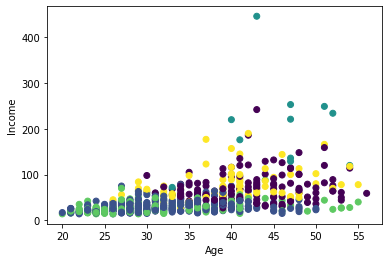

In [25]:
#Plot de los valores 
plt.scatter(df['Age'], df['Income'], c = df['clusters'])
plt.xlabel('Age')
plt.ylabel('Income');

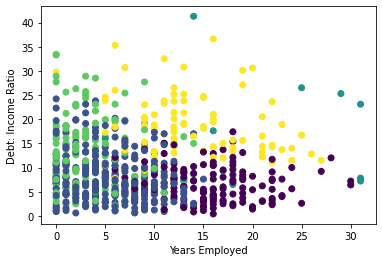

In [26]:
#Plot de los valores 
plt.scatter(df['Years Employed'], df['DebtIncomeRatio'], c = df['clusters'])
plt.xlabel('Years Employed')
plt.ylabel('Debt: Income Ratio');

In [27]:
df['clusters'].value_counts()

1    316
3    147
0    140
4     86
2     11
Name: clusters, dtype: int64

In [31]:
seg1 =df[df['clusters']==0]
seg2 =df[df['clusters']==1]
seg3 =df[df['clusters']==2]
seg4 =df[df['clusters']==3]
seg5 =df[df['clusters']==4]

In [32]:
cust_segs = [seg1, seg2, seg3, seg4, seg5]
for seg in cust_segs:
  print(seg.describe().T)

                 count       mean        std     min       25%      50%  \
Age              140.0  41.857143   5.639750  30.000  38.00000  41.0000   
Edu              140.0   1.528571   0.808612   1.000   1.00000   1.0000   
Years Employed   140.0  15.807143   4.755756   4.000  12.75000  16.0000   
Income           140.0  69.007143  32.424011  27.000  46.00000  60.0000   
Card Debt        140.0   1.468221   1.168572   0.071   0.58125   1.0645   
Other Debt       140.0   2.749129   1.765685   0.188   1.38675   2.4775   
Defaulted        140.0   0.021429   0.145328   0.000   0.00000   0.0000   
DebtIncomeRatio  140.0   6.585000   3.648039   0.400   3.57500   5.9500   
clusters         140.0   0.000000   0.000000   0.000   0.00000   0.0000   

                      75%      max  
Age              46.00000   56.000  
Edu               2.00000    5.000  
Years Employed   18.25000   30.000  
Income           81.00000  242.000  
Card Debt         1.95150    5.501  
Other Debt        3.92375  

In [37]:
#Salvo en una lista todos los valores promedios de las columnas que escoja
age_means = [np.mean(segment['Age'])for segment in cust_segs]
income_means = [np.mean(segment['Income'])for segment in cust_segs]
debtincome_means = [np.mean(segment['DebtIncomeRatio'])for segment in cust_segs]

In [39]:
sumario_df = pd.DataFrame({'Cust Segment' : [seg1, seg2, seg3, seg4, seg5],
                           'Age means' : age_means,
                           'Income means': income_means,
                           'DebtIncomeRatio means' : debtincome_means})

In [40]:
sumario_df

,Cust Segment,Age means,Income means,DebtIncomeRatio means
0,Age Edu Years Employed Income ...,41.857143,69.007143,6.585000
1,Age Edu Years Employed Income ...,31.848101,29.892405,7.981013
2,Age Edu Years Employed Income ...,45.636364,205.090909,17.118182
3,Age Edu Years Employed Income ...,31.176871,28.727891,13.197959
4,Age Edu Years Employed Income ...,39.453488,73.662791,18.722093
